<a href="https://colab.research.google.com/github/sush2004/Python/blob/main/ML_CA2_Classification_10550452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas

In [ ]:
#Calling classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#Loading dataset
candy_power = pd.read_csv("candy-data.csv")
candy_power.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
# Converting data to 0 and 1 for column winpercent
candy_power["rank_high_low"]= (candy_power["winpercent"] >= 60.0).astype(int)
candy_power.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,rank_high_low
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [ ]:
# Dropping column winpercent 
candy_power = candy_power.drop(['winpercent'],axis=1)
candy_power.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,rank_high_low
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0


In [ ]:
# Check for missing values
null_col = candy_power.isnull().sum()
print(null_col)

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
rank_high_low       0
dtype: int64


In [ ]:
candy_power.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,rank_high_low
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,0.247059
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,0.433861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,1.000000


In [ ]:
columns = candy_power.dtypes
print(columns)

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
rank_high_low         int64
dtype: object


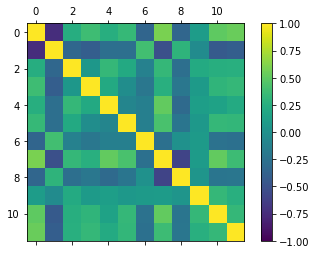

In [ ]:
#Correlation Matrix
corr_matrix = candy_power.corr()
#plotting the correlation matrix
fig = pyplot.figure()
x1 = fig.add_subplot(111)
cx = x1.matshow(corr_matrix,vmin = -1,vmax = 1)
fig.colorbar(cx)
pyplot.show()

In [ ]:
candy_power.corr().abs()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,rank_high_low
chocolate,1.000000,0.741721,0.249875,0.377824,0.254892,0.341210,0.344177,0.597421,0.339675,0.104169,0.504675,0.542404
fruity,0.741721,1.000000,0.335485,0.399280,0.269367,0.269367,0.390678,0.515066,0.299725,0.034393,0.430969,0.405340
caramel,0.249875,0.335485,1.000000,0.059356,0.328493,0.213113,0.122355,0.333960,0.269585,0.221933,0.254327,0.260420
peanutyalmondy,0.377824,0.399280,0.059356,1.000000,0.213113,0.017646,0.205557,0.260420,0.206109,0.087889,0.309153,0.333960
nougat,0.254892,0.269367,0.328493,0.213113,1.000000,0.089744,0.138675,0.522976,0.310339,0.123081,0.153196,0.225300
crispedricewafer,0.341210,0.269367,0.213113,0.017646,0.089744,1.000000,0.138675,0.423751,0.224693,0.069950,0.328265,0.324526
hard,0.344177,0.390678,0.122355,0.205557,0.138675,0.138675,1.000000,0.265165,0.014532,0.091810,0.244365,0.265165
bar,0.597421,0.515066,0.333960,0.260420,0.522976,0.423751,0.265165,1.000000,0.593409,0.099985,0.518407,0.367560
pluribus,0.339675,0.299725,0.269585,0.206109,0.310339,0.224693,0.014532,0.593409,1.000000,0.045523,0.220794,0.211290
sugarpercent,0.104169,0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.260092


In [ ]:
# Removing highly correlated columns 
# Remove fruity since very high correlation with chocolate
corr_candy_power = candy_power.drop(['fruity'],axis=1)


In [ ]:
#Data preparations
features_candy = corr_candy_power.values[:,1:11]
label_win = corr_candy_power.values[:,11]
print(label_win)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
#Train Test Split
train_x,test_x,train_y,test_y = train_test_split(features_candy,label_win, test_size = 0.20, random_state = 20)
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

68
17
68
17


In [ ]:
#Adjusting Data types for modeling
train_y = train_y.astype(int)
train_x = train_x.astype(int)
test_y = test_y.astype(int)


In [ ]:
model_candy = DecisionTreeClassifier()
model_candy.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Make predictions using the testing set
predict_y = model_candy.predict(test_x)


In [ ]:
#Accuracy of the model
accuracy = accuracy_score(test_y,predict_y)

In [ ]:
print("Accuracy of the model is {}".format(accuracy*100))

Accuracy of the model is 94.11764705882352


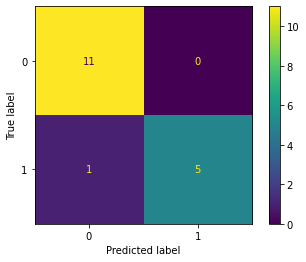

In [ ]:
# Plotting the confusion matrix
plot_confusion_matrix(model_candy, test_x, test_y)  
pyplot.show() 